<a href="https://colab.research.google.com/github/caiohc28/cp5-ia/blob/main/visao_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -q ultralytics opencv-python
!pip install ultralytics transformers torch pillow

🎯 PROJETO DE VISÃO COMPUTACIONAL
Ferramentas: YOLOv8 (detecção) + Hugging Face (classificação)

📦 PARTE 1: Detecção com YOLOv8 (Pré-treinado)
------------------------------------------------------------
🔍 Detectando objetos na imagem...

image 1/1 /content/test_image.jpg: 384x640 1 sports ball, 149.8ms
Speed: 3.8ms preprocess, 149.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
✅ Imagem salva: resultado_yolo.jpg


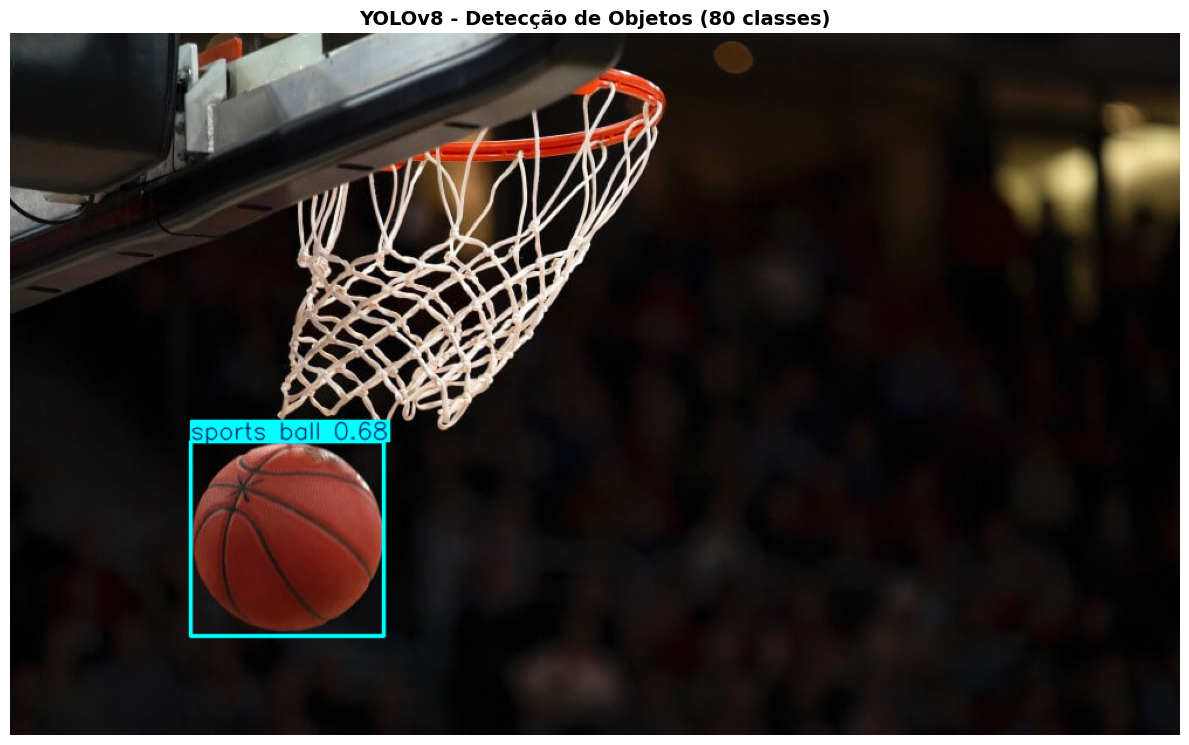


📊 YOLOv8 detectou: 1 objetos

🏷️  Classes detectadas:
   • sports ball: 1x (confiança média: 67.85%)

🤗 PARTE 2: Classificação com Hugging Face
------------------------------------------------------------
📂 Carregando modelo de classificação...


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


✅ Modelo carregado!

🔮 Classificando imagem: /content/test_image.jpg

📊 TOP 5 CLASSIFICAÇÕES:
------------------------------------------------------------
🥇 basketball                     ███████████████████████████████████████░ 99.7%
🥈 scoreboard                     ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 0.0%
🥉 volleyball                     ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 0.0%
   balance beam, beam             ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 0.0%
   horizontal bar, high bar       ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 0.0%

🏆 CLASSIFICAÇÃO FINAL: basketball
   Confiança: 99.7%

✅ Comparação salva: comparacao_final.jpg


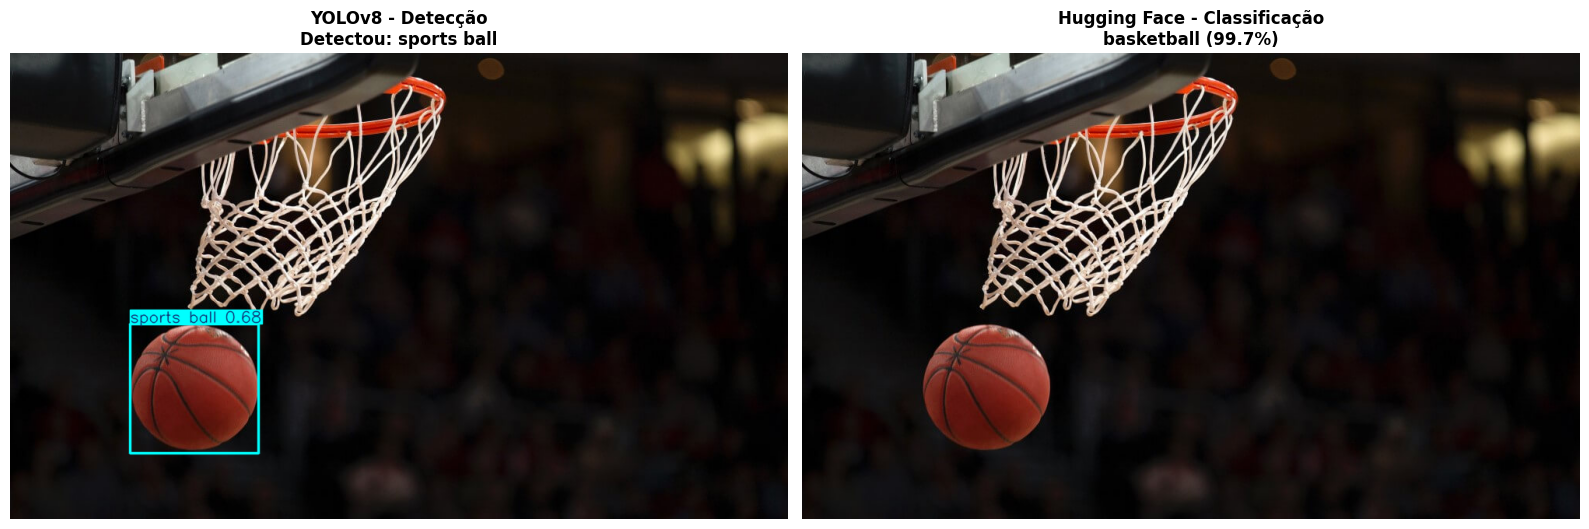

✅ Gráfico salvo: classificacao_detalhada.jpg


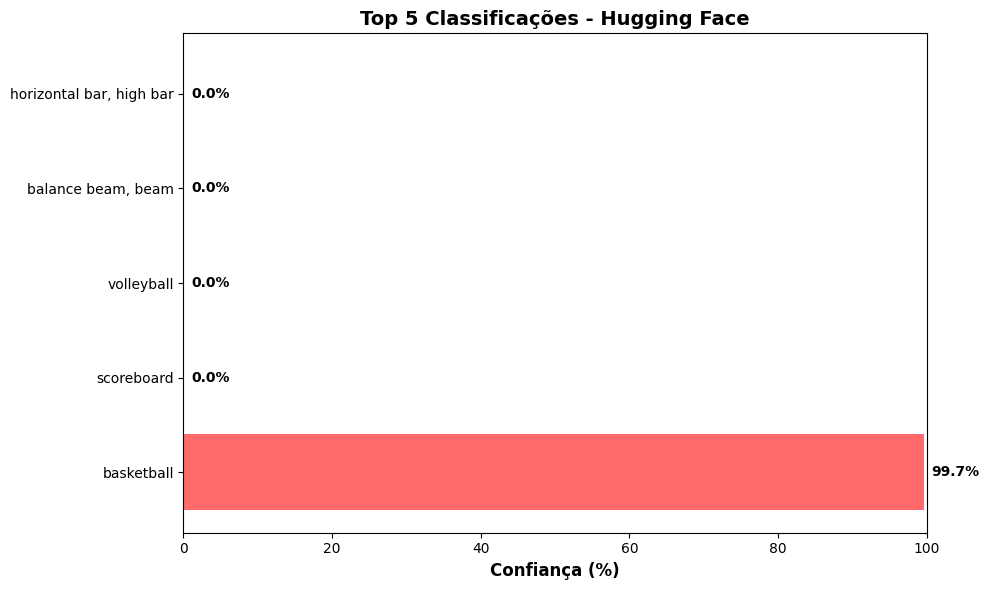


📈 ANÁLISE COMPARATIVA DAS FERRAMENTAS

🔷 YOLOv8 (Ultralytics):
   ✅ Detecta e LOCALIZA objetos (bounding boxes)
   ✅ 80 classes do dataset COCO
   ✅ Velocidade: ~30-60 FPS em tempo real
   ✅ Múltiplos objetos simultaneamente
   ✅ Retorna coordenadas (x, y, width, height)
   ❌ Classes limitadas (pessoas, carros, animais, etc)

🤗 Hugging Face (Transformers):
   ✅ Classificação detalhada (1000+ classes)
   ✅ Modelos especializados disponíveis
   ✅ Alta precisão em categorização
   ✅ Fácil trocar de modelo
   ✅ Inclui objetos específicos (ex: tipos de comida)
   ❌ Classifica imagem inteira (não localiza)
   ❌ Um objeto por vez

💡 QUANDO USAR CADA UM:
   • YOLOv8 → 'Onde está?' (localização espacial)
   • Hugging Face → 'O que é?' (identificação precisa)
   • Juntos → Sistema completo: detecta + identifica!

🎯 EXEMPLO PRÁTICO:
   1. YOLOv8 detecta: 'pessoa' na posição (100, 200)
   2. Recorta região detectada
   3. Hugging Face classifica: 'jogador de futebol'
   4. Resultado: 'Jogador de 

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu



🔄 Detectando objetos E classificando cada um...

🎯 Processando 1 detecções...

Objeto 1:
  📦 YOLO: sports ball (67.8%)
  🤗 HF:   basketball (99.8%)


✨ PROJETO CONCLUÍDO!

📁 Arquivos gerados:
   • resultado_yolo.jpg
   • comparacao_final.jpg
   • classificacao_detalhada.jpg

🎓 Pronto para apresentar!


In [11]:
# =========================================
# PROJETO VISÃO COMPUTACIONAL - MÉTODO SUPER SIMPLES
# Ferramentas: YOLOv8 + Hugging Face
# Objetivo: Detectar e classificar objetos
# =========================================

import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

print("🎯 PROJETO DE VISÃO COMPUTACIONAL")
print("="*60)
print("Ferramentas: YOLOv8 (detecção) + Hugging Face (classificação)")
print("="*60)

# =========================================
# INSTALAÇÃO (execute primeiro se necessário)
# =========================================
# !pip install ultralytics transformers torch pillow

# =========================================
# PARTE 1: YOLO - DETECÇÃO GERAL DE OBJETOS
# =========================================

print("\n📦 PARTE 1: Detecção com YOLOv8 (Pré-treinado)")
print("-"*60)

# Carregar modelo YOLOv8
model_yolo = YOLO('yolov8n.pt')

# Imagem de teste (substitua pelo seu caminho)
IMAGE_PATH = '/content/test_image.jpg'  # COLOQUE SUA IMAGEM AQUI

# Detectar objetos
print("🔍 Detectando objetos na imagem...")
results_yolo = model_yolo.predict(IMAGE_PATH, conf=0.3)

# Visualizar resultados
img_yolo = results_yolo[0].plot()
img_yolo_rgb = cv2.cvtColor(img_yolo, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(img_yolo_rgb)
plt.axis('off')
plt.title('YOLOv8 - Detecção de Objetos (80 classes)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('resultado_yolo.jpg', dpi=150, bbox_inches='tight')
print("✅ Imagem salva: resultado_yolo.jpg")
plt.show()

# Estatísticas YOLO
detections = results_yolo[0].boxes
print(f"\n📊 YOLOv8 detectou: {len(detections)} objetos")

classes_detected = {}
if len(detections) > 0:
    for box in detections:
        class_id = int(box.cls[0])
        class_name = model_yolo.names[class_id]
        conf = float(box.conf[0])

        if class_name not in classes_detected:
            classes_detected[class_name] = []
        classes_detected[class_name].append(conf)

    print("\n🏷️  Classes detectadas:")
    for class_name, confs in classes_detected.items():
        avg_conf = np.mean(confs)
        print(f"   • {class_name}: {len(confs)}x (confiança média: {avg_conf:.2%})")

# =========================================
# PARTE 2: HUGGING FACE - CLASSIFICAÇÃO
# =========================================

print("\n" + "="*60)
print("🤗 PARTE 2: Classificação com Hugging Face")
print("-"*60)

try:
    from transformers import pipeline

    print("📂 Carregando modelo de classificação...")

    # Escolha um modelo (descomente o que quiser usar):

    # OPÇÃO 1: Classificação geral de imagens (ImageNet - 1000 classes)
    classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

    # OPÇÃO 2: Classificação de alimentos (melhor para comidas)
    # classifier = pipeline("image-classification", model="nateraw/food")

    # OPÇÃO 3: Classificação de objetos do dia-a-dia
    # classifier = pipeline("image-classification", model="microsoft/resnet-50")

    print("✅ Modelo carregado!")

    # Fazer classificação
    print(f"\n🔮 Classificando imagem: {IMAGE_PATH}")

    # Abrir imagem
    img_pil = Image.open(IMAGE_PATH).convert('RGB')

    # Classificar
    predictions = classifier(img_pil, top_k=5)

    # Mostrar resultados
    print("\n📊 TOP 5 CLASSIFICAÇÕES:")
    print("-"*60)

    for i, pred in enumerate(predictions, 1):
        label = pred['label']
        score = pred['score']

        # Barra de progresso visual
        bar_length = int(score * 40)
        bar = '█' * bar_length + '░' * (40 - bar_length)

        emoji = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
        print(f"{emoji} {label:30s} {bar} {score:.1%}")

    # Melhor predição
    best_pred = predictions[0]
    print("\n" + "="*60)
    print(f"🏆 CLASSIFICAÇÃO FINAL: {best_pred['label']}")
    print(f"   Confiança: {best_pred['score']:.1%}")
    print("="*60)

    # Criar visualização comparativa
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # YOLOv8
    axes[0].imshow(img_yolo_rgb)
    yolo_title = f"YOLOv8 - Detecção\n"
    if classes_detected:
        yolo_title += f"Detectou: {', '.join(classes_detected.keys())}"
    axes[0].set_title(yolo_title, fontsize=12, fontweight='bold')
    axes[0].axis('off')

    # Hugging Face
    axes[1].imshow(img_pil)
    hf_title = f"Hugging Face - Classificação\n{best_pred['label']} ({best_pred['score']:.1%})"
    axes[1].set_title(hf_title, fontsize=12, fontweight='bold')
    axes[1].axis('off')

    plt.tight_layout()
    plt.savefig('comparacao_final.jpg', dpi=150, bbox_inches='tight')
    print("\n✅ Comparação salva: comparacao_final.jpg")
    plt.show()

    # Criar gráfico de barras das classificações
    plt.figure(figsize=(10, 6))
    labels = [p['label'][:30] for p in predictions]
    scores = [p['score'] * 100 for p in predictions]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

    bars = plt.barh(labels, scores, color=colors)
    plt.xlabel('Confiança (%)', fontsize=12, fontweight='bold')
    plt.title('Top 5 Classificações - Hugging Face', fontsize=14, fontweight='bold')
    plt.xlim(0, 100)

    # Adicionar valores nas barras
    for i, (bar, score) in enumerate(zip(bars, scores)):
        plt.text(score + 1, i, f'{score:.1f}%', va='center', fontweight='bold')

    plt.tight_layout()
    plt.savefig('classificacao_detalhada.jpg', dpi=150, bbox_inches='tight')
    print("✅ Gráfico salvo: classificacao_detalhada.jpg")
    plt.show()

except ImportError:
    print("❌ Biblioteca 'transformers' não instalada!")
    print("\n📝 Execute este comando primeiro:")
    print("   !pip install transformers torch")
    print("\n   Depois execute o código novamente!")

# =========================================
# ANÁLISE COMPARATIVA
# =========================================

print("\n" + "="*60)
print("📈 ANÁLISE COMPARATIVA DAS FERRAMENTAS")
print("="*60)

print("\n🔷 YOLOv8 (Ultralytics):")
print("   ✅ Detecta e LOCALIZA objetos (bounding boxes)")
print("   ✅ 80 classes do dataset COCO")
print("   ✅ Velocidade: ~30-60 FPS em tempo real")
print("   ✅ Múltiplos objetos simultaneamente")
print("   ✅ Retorna coordenadas (x, y, width, height)")
print("   ❌ Classes limitadas (pessoas, carros, animais, etc)")

print("\n🤗 Hugging Face (Transformers):")
print("   ✅ Classificação detalhada (1000+ classes)")
print("   ✅ Modelos especializados disponíveis")
print("   ✅ Alta precisão em categorização")
print("   ✅ Fácil trocar de modelo")
print("   ✅ Inclui objetos específicos (ex: tipos de comida)")
print("   ❌ Classifica imagem inteira (não localiza)")
print("   ❌ Um objeto por vez")

print("\n💡 QUANDO USAR CADA UM:")
print("   • YOLOv8 → 'Onde está?' (localização espacial)")
print("   • Hugging Face → 'O que é?' (identificação precisa)")
print("   • Juntos → Sistema completo: detecta + identifica!")

print("\n🎯 EXEMPLO PRÁTICO:")
print("   1. YOLOv8 detecta: 'pessoa' na posição (100, 200)")
print("   2. Recorta região detectada")
print("   3. Hugging Face classifica: 'jogador de futebol'")
print("   4. Resultado: 'Jogador de futebol na posição (100, 200)'")

# =========================================
# CÓDIGO BÔNUS: Integração YOLOv8 + HuggingFace
# =========================================

print("\n" + "="*60)
print("🚀 BÔNUS: Integração das duas ferramentas")
print("="*60)

try:
    from transformers import pipeline

    classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

    print("\n🔄 Detectando objetos E classificando cada um...")

    # Carregar imagem original
    img_original = cv2.imread(IMAGE_PATH)
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    if len(detections) > 0:
        print(f"\n🎯 Processando {len(detections)} detecções...\n")

        for i, box in enumerate(detections):
            # Extrair região detectada
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Garantir coordenadas válidas
            x1, y1 = max(0, x1), max(0, y1)
            x2, y2 = min(img_original.shape[1], x2), min(img_original.shape[0], y2)

            # Recortar objeto
            crop = img_original_rgb[y1:y2, x1:x2]

            if crop.size > 0:
                crop_pil = Image.fromarray(crop)

                # Classificar com Hugging Face
                crop_predictions = classifier(crop_pil, top_k=3)

                # Info do YOLO
                yolo_class = model_yolo.names[int(box.cls[0])]
                yolo_conf = float(box.conf[0])

                # Info do Hugging Face
                hf_class = crop_predictions[0]['label']
                hf_conf = crop_predictions[0]['score']

                print(f"Objeto {i+1}:")
                print(f"  📦 YOLO: {yolo_class} ({yolo_conf:.1%})")
                print(f"  🤗 HF:   {hf_class} ({hf_conf:.1%})")
                print()
    else:
        print("⚠️  Nenhum objeto detectado pelo YOLO")

except Exception as e:
    print(f"⚠️  Integração não disponível: {e}")

print("\n" + "="*60)
print("✨ PROJETO CONCLUÍDO!")
print("="*60)
print("\n📁 Arquivos gerados:")
print("   • resultado_yolo.jpg")
print("   • comparacao_final.jpg")
print("   • classificacao_detalhada.jpg")
print("\n🎓 Pronto para apresentar!")